# Checkpoint I

Group members: Gregory Ho, Jonathan Juarez, Sarah Walker, Yueyue Wang

(Alphabetic order of first name)

## 1.) Abstract

The objective of this project is to build and evaluate several machine learning models. This project is a multiclass classification problem that attempts to assign a class of poverty labels to a particular household based on the household's observable characteristics.

## 2.) Brief Literature Review

Before we commence with exploring the dataset, we begun by conducting a brief survey of the literature on Poverty metrices and the socio-economic and demographic description of Costa Rica which contextualizes this ML project. As the dataset that was sourced from Kaggle was originally published 5 years ago in the year 2018, our socio-economic and demographic survey were based on studies conducted pre-covid, between 2014 to 2019.

Costa Rica is a country situated in Central America. For a country with a population size of 4.9 million, in 2016, it had a GDP per capita of US$13,876 in current PP (upper-middle income country). Of the 4.9 million people, about three-quarters live in Urban Areas.

According to the World Bank, Costa Rica uses two income-based poverty lines[1]. Extreme poverty (Target 1 in this ML Project), is defined based on the food poverty line index (fPLI). The fPLI represents the amount of money a household needs for each member in the household to meet a minimum caloric intake. These refer to individuals with a harmonized per capita income of lower than $2.50 a day.

On the other hand, the overall poverty line considered other basic resources beyond food (this likely corresponds with Target 2 in this ML project). These refer to individuals with a harmonized per capita income of lower than $4.00 a day. Targets 1 and 2 jointly account for around 10% of Costa Rica's population.

Still, about one-third of the population (36% representing those with per capita incomes between $4.00 and \$10.00 USD a day) remains vulnerable (Target 3 in this ML Project) to falling back into poverty if hit by a shock. Similarly, target 4 refers to households that are non-vulnerable and non-poor (49% of population).

Spatially, poverty rates are the lowest in the Central region. However, headcount poverty is the highest in the central region. This is because about half (1.7 million) of Costa Rica's population reside in the central region. Regional disparities are significant, with poverty rates being much higher in border areas.

The following table by World Bank provides a description of those under the various classes of Costa Rican society:

| Characteristics                 | Extreme Poor | Overall Poor | Non-Poor | Bottom 40 percent | Top 60 percent |
|---------------------------------|--------------|--------------|----------|-------------------|----------------|
| Age of the head                 | 48.8         | 50.9         | 50.1     | 50.1              | 50.4           |
| Male-headed household (percent) | 54.6         | 56.7         | 63.9     | 58.7              | 64.4           |
| Proportion age 0–12 (percent)   | 23.7         | 21.2         | 11.5     | 19.9              | 10.2           |
| Proportion age 13–18 (percent)  | 12.1         | 11.2         | 7.9      | 11.5              | 7.0            |
| Proportion age 19–70 (percent)  | 57.9         | 56.8         | 72.7     | 58.6              | 75.2           |
| Proportion age 70+ (percent)    | 6.4          | 10.7         | 7.9      | 10.0              | 7.7            |
| Household size (number)         | 3.6          | 3.7          | 3.2      | 3.7               | 3.1            |
| Education of household head (years) | 5.4      | 5.6          | 9.2      | 5.9               | 9.9            |
| Monthly per capita income (CRC) | 24,845       | 59,174       | 431,636  | 82,124            | 500,020        |
| Employment sector (percent)     |              |              |          |                   |                |
| Primary sector                  | 22.1         | 18.5         | 8.9      | 18.1              | 7.5            |
| Manufacturing                   | 10.6         | 12.2         | 11.4     | 12.8              | 11.0           |
| Construction                    | 7.9          | 8.3          | 5.7      | 8.7               | 5.1            |
| Utilities                       | 8.6          | 5.7          | 6.8      | 6.1               | 6.8            |
| Retail                          | 16.4         | 18.6         | 18.3     | 17.9              | 18.4           |
| Services                        | 20.8         | 25.4         | 42.9     | 25.2              | 45.8           |
| Domestic services               | 13.1         | 10.9         | 5.8      | 10.9              | 5.0            |
| Labor force (percent)           |              |              |          |                   |                |
| Employee                        | 29.9         | 47.3         | 75.1     | 56.6              | 76.3           |
| Employer                        | 0.8          | 1.1          | 4.3      | 1.5               | 4.7           |
| Self-Employed                  | 28.6          | 25.4         | 14.2     | 21.8               | 13.6          |
| Unpaid Worker                 | 3.3          | 1.9          | 0.7      | 1.4               | 0.7            |
| Unemployed                 | 37.4          | 24.2          | 5.8      | 18.7               | 4.7            |
| Female labor force participation  | 26.7          | 32.1          | 55.6      | 34.5               | 59.8            |

**Ref and Notes:**

[1] “Oviedo, Ana Maria; Sanchez, Susana M.; Lindert, Kathy A.; Lopez, J. Humberto. 2015. Costa Rica's Development: From Good to Better. Systematic Country Diagnostic;. © World Bank, Washington, DC. http://hdl.handle.net/10986/22023 License: CC BY 3.0 IGO.”

## 3.) Exploratory Data Analysis

Our brief literature reveals some interesting aspects surrounding the context of Costa Rican poverty:
*   Targets 1 and 2 were based on the food PLI and the overall PLI.
*   Target 3 represents vulnerable households accounting for 36% of Costa Rican population.
*   Poverty rates were higher in rural areas, but poverty headcount was highest in central region which was occupied by around half of the entire Costa Rican population
*   Households categorized as poor often had a larger proportion of children (age 0 - 12 and 13 - 18), had a smaller proportion of adults aged between 19 - 70. Their household heads had fewer years of education, had jobs that were concentrated in the primary sector (agriculture and mining?) or were outside the formal labor force entirely. Head of households were mostly unemployed.   
*   Head of households also had a lower proportion of female labor force participation


Against this set of descriptors, our objectives in this Exploratory Data Analysis segment are as follows:

1.   To examine if the target variable follow the same distribution as reported in Costa Rican Official statistics?
    *   by population
    *   by region

2.   Feature Engineering Plan- Creating/Grouping/categorizing features according to standard dimensions of deprivation (Food, Housing, Education, Basic Amenities, hardship, and so on)

##Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv('train.csv')
check1 = df_train.copy()

#### Data Check 1 - Each household has one head

In [ ]:
check1 = df_train.copy()
check1 = check1.loc[(df_train.loc[:,'parentesco1'] == 1), :]
unique_hhid = df_train['idhogar'].unique().shape[0]
print(f"count of heads: {check1.shape[0]}, unique household ids: {unique_hhid}; all households should have one head")

count of heads: 2973, unique household ids: 2988; all households should have one head


It seems that there were 2988 unique household IDs, but only 2973 head of households.

#### Data Check II - Checking for Null values

In [ ]:
#determining columns with Null values (hypothesis: the nulls for rents may have value in own house varible, pls check)
df_train.columns[df_train.isnull().sum()>0]
df_train[['v2a1', 'v18q1', 'rez_esc']].head(10)

,v2a1,v18q1,rez_esc
0,190000.0,NaN,NaN
1,135000.0,1.0,NaN
2,NaN,NaN,NaN
3,180000.0,1.0,1.0
4,180000.0,1.0,NaN
5,180000.0,1.0,NaN
6,180000.0,1.0,0.0
7,130000.0,NaN,0.0
8,130000.0,NaN,NaN
9,130000.0,NaN,NaN


In [ ]:
null_df = df_train.apply(lambda x: sum(x.isnull())).to_frame(name='count')
non_null_df = null_df[null_df['count'] > 5]
print(non_null_df)

         count
v2a1      6860
v18q1     7342
rez_esc   7928


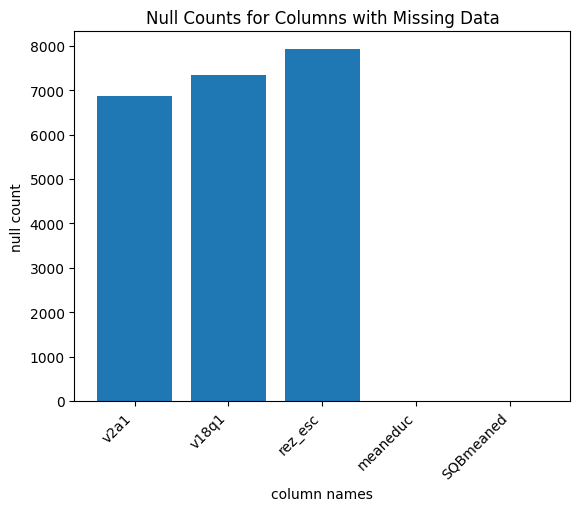

In [ ]:
#visualize amount of null values
null_df = df_train.apply(lambda x: sum(x.isnull())).to_frame(name='count')
null_df = null_df[null_df['count'] != 0]  # Keep only columns with non-zero null counts
plt.bar(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=45, horizontalalignment='right')
plt.xlabel('column names')
plt.ylabel('null count')
plt.title('Null Counts for Columns with Missing Data')
plt.show()

We observe a significant count of null values arising from the following columns:
*   v2a1 - Monthly rent payment [HH Level var]
*   v18q1 - Number of tablets household owns [HH Level var]
*   rez_esc - Years behind in school [IND Level var]


We examined whether the missing values in *monthly rent payments* are associated with *owning a house* or not. Out of 6860 missing values, 5911 belong to individuals who own a house, while 949 belong to individuals who do not own a house. Based on this information, we can decide to either remove the missing values when we aggregate data into household level.

In [ ]:
df_train.loc[(df_train.loc[:,'v2a1'].isna()),['tipovivi1']].value_counts()

tipovivi1
1            5911
0             949
dtype: int64

We examined whether the missing values in *Number of tablets household owns* are associated with *owning a tablet* or not. Based on the output below information, we determine that the missing value of *Number of tablets household owns* due to not owning a tablet.

In [ ]:
df_train.loc[(df_train.loc[:,'v18q1'].isna()),['v18q']].value_counts() == sum(df_train.loc[:,'v18q1'].isna())

v18q
0       True
dtype: bool

We examined whether the missing values in *Years behind in school* are kind of associated with *having education level* or not. Out of 7928 missing values, 1183 belong to individuals who don't have education level, while 6745 belong to individuals who do have education level. The information maybe useful for us to decide whether to fill or remove the nulls.

In [ ]:
df_train.loc[(df_train.loc[:,'rez_esc'].isna()),['instlevel1']].value_counts()

instlevel1
0             6745
1             1183
dtype: int64

### Data Check III - All members have the same poverty class

In [ ]:
check3 = df_train.copy()
hh_poverty = check3.groupby('idhogar')['Target'].apply(lambda x: x.mode()[0]).reset_index()

# Merge the household poverty class back to the original DataFrame
df_train_merged = pd.merge(check3, hh_poverty, on='idhogar', suffixes=('', '_new'))

# Check if there are any households where members have different poverty class
diff_class = df_train_merged.loc[df_train_merged['Target'] != df_train_merged['Target_new'], :]
num_diff_hh = diff_class['idhogar'].nunique()

print(f"There are {num_diff_hh} households where members have different poverty class assignment.")

There are 85 households where members have different poverty class assignment.


### Describe Data

In [ ]:
##descriptive statistics for numerical features
numeric_columns = df_train.select_dtypes(include=np.number)
numeric_columns.describe(include = 'all').round(decimals = 2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2697.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,2215.00,9557.00,9557.00,...,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9552.00,9557.00,9557.00
mean,165231.61,0.04,4.96,0.02,0.99,0.96,0.23,1.40,0.39,1.56,...,74.22,1643.77,19.13,53.50,3.84,3.25,3.90,102.59,1643.77,3.30
std,150457.13,0.19,1.47,0.15,0.07,0.20,0.42,0.76,0.68,1.04,...,76.78,1741.20,18.75,78.45,6.95,4.13,12.51,93.52,1741.20,1.01
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.04,0.00,0.00,0.00,1.00
25%,80000.00,0.00,4.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,...,16.00,289.00,9.00,0.00,0.00,1.00,0.11,36.00,289.00,3.00
50%,130000.00,0.00,5.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,...,36.00,961.00,16.00,36.00,1.00,2.25,0.44,81.00,961.00,4.00
75%,200000.00,0.00,6.00,0.00,1.00,1.00,0.00,2.00,1.00,2.00,...,121.00,2601.00,25.00,81.00,4.00,4.00,1.78,134.56,2601.00,4.00
max,2353477.00,1.00,11.00,1.00,1.00,1.00,1.00,6.00,5.00,8.00,...,441.00,9409.00,169.00,441.00,81.00,36.00,64.00,1369.00,9409.00,4.00


In [ ]:
#descriptive statistics for categorical features
categorical_columns = df_train.select_dtypes(exclude='number')
categorical_columns.describe(include='all')

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_279628684,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


### Examining the proportion of Targets

Based on our literature review,

Target 1 (Extreme Poverty) averaged 7.2% in the 2010 - 2014 period

Overall Poverty hovered at around 24% in the same period.
> Target 2 = Overall Poverty - Extreme Poverty

Target 2 should account for around 16.8% of Costa Rican population

Target 3 represents roughly 47%

Target 4 represents roughly 29%

However, the Kaggle dataset produces the following:

In [ ]:
check2 = df_train.copy()

# group the data by target and count the households
grouped_df = check2.groupby('Target')['idhogar'].nunique().reset_index()
grouped_df.columns = ['Target', 'count of households']

# calculate proportion of households for each target category
total_households = grouped_df['count of households'].sum()
grouped_df['proportion'] = grouped_df['count of households'] / total_households

# plot the bar chart using plotly
fig = px.bar(grouped_df, x='Target', y='proportion', text='proportion',
             title='Proportion of households, by target')
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(xaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1
    ))
fig.show()

We have found that the training dataset does not mirror the proportions reported in Costa Rican offical statistics.

> In Kaggle's training dataset, Target 3 is severely underrepresented (12.59% as opposed to 47%), while Target 4 is severely overrepresented (63.7% as opposed to 29%)

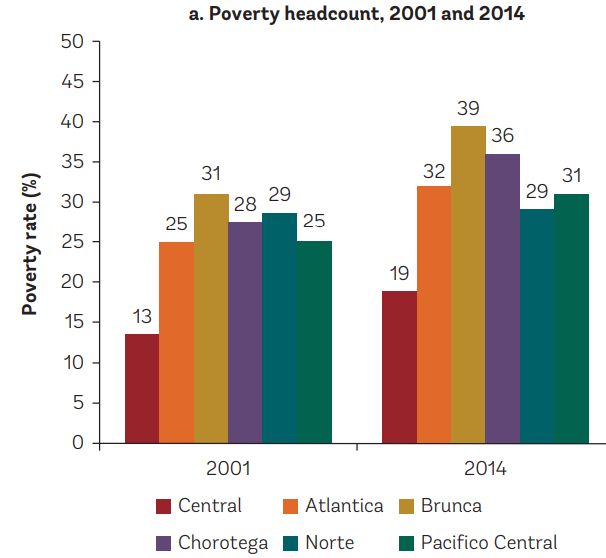

Source: [1] Calculations using 2001 EHPM and 2014 ENAHO survey

Based on our literature review, it is reported that poverty rates vary significantly. Poverty rates were reported to be as high as 39% in the Brunca and 36% Chorotega regions, as compared to the 19% in the central region.

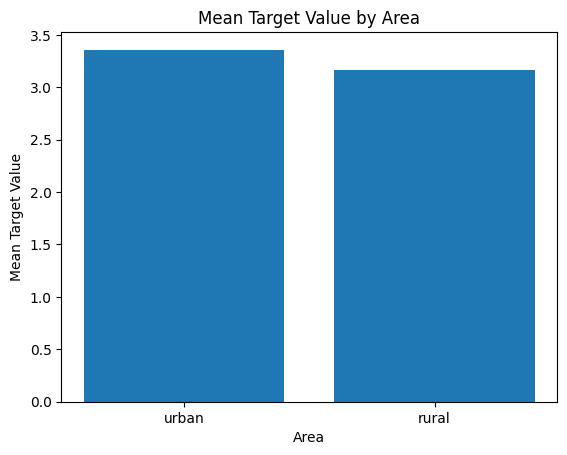

In [ ]:
#By rural/ area categories
# Group the data by the 'area1' column (urban)
area1_target = df_train.groupby('area1')['Target']
area1_target.describe(include = 'all').round(decimals = 3)
area1_mean = area1_target.mean()

#Group the data by the 'area2' column (rural)
area2_target = df_train.groupby('area2')['Target']
area2_target.describe(include = 'all').round(decimals = 3)

area2_mean = area2_target.mean()

#Compare the mean target values for 'area1' and 'area2'
plt.bar(['urban', 'rural'], [area1_mean[1], area2_mean[1]])
plt.xlabel('Area')
plt.ylabel('Mean Target Value')
plt.title('Mean Target Value by Area')
plt.show()

## 4.) Organization of Data

Each row in the Kaggle dataset represents an individual. However, the task is a multi-class classification problem framed at the level of households. To relate household and indivudal level variables, our group plans to structure a dataframe such that each row represents a house (identified by house id) and each column is a feature variable we consider to be significant for predicting the poverty level (i.e. classifying the y column).

The column/feature variables will be constructed from the following:
 - existing variables from the original data frame that characterize the household level.
  - ex: we may decide to include the variable "area1" from the original dataframe, which equals 1 if the house is located in an urban zone, and 0 otherwise. This should also compliment the variable "area2" (which indicates if the house is located in a rural area), so we would only need to include one and not the other in our new dataframe.  
 - a manipulation of household level variables that simplifies or combines multiple features given in the original data frame
  - ex. transforming numerical varibales from the original dataframe into categorical variables or indicators varibales based on ranges in the new dataframe
  - ex. we can perform calculations on multiple household level features from the original dataframe in order to draw new relationship features in the constructed data frame. (some specifics of this explained below in Yueyue's section)
 - An aggregation or manipulation of the individual level features given in the original dataframe; then, the feature/column variable in the new dataframe will represent characteristics of the individuals within that household
  - ex. we can determine which individuals reside in which houses by mapping the individual ids to the household ids. If there are 4 adults living in a house, each with their own education level, and we wish to create a feature variable "average_education", we can determine a way to average, aggregate, take the max, etc. of all 4 individual education levels in order to relate it to a single measure that can represent the household. In this way, we are relating individual features from the original data frame into a constructed variable in the new dataframe which can represent the single row/household.

### 5.) Feature Engineering and Categorization Plan

The current dataset comprises 141 variables, with a significant portion of them exhibiting high levels of complementarity or explanatory power towards one another. This characteristic enables the features to be grouped into a smaller set of strong descriptive forms, which can facilitate more effective machine learning model training and interpretation of the results.



#### **Introduction**

Poverty is multidimensional by nature. Households who are categorized as poor, often experience simultaneous and interrelated deprivations along several aspects of life, such as income, health, education, housing and access to basic services and amenities. These dimensions of deprivation are interconnected and mutually reinforcing - resulting in an emergent vicious cycle of poverty. For example, an individual that has poor health, might find it hard to achieve their desired educational outcomes, thus restricting job opportunities. This in turn exacerbates their health problems and perpetuates the vicious cycle of poverty.

The Multidimensional Poverty Index (MPI) is a measure which captures the percentage of households that are deprived along 1 monetary dimension and 3 broad non-monetary dimensions:

1.   Monetary Poverty - As is the case with Targets 1 and 2. Often defined using the food PLI and non-food PLI, derived using the Cost of Basic Needs approach.
2.   Health - Child mortality, Nutrition, Life expectancy
3.   Education - Years of schooling, School attendance
4.   Standard of Living - Housing, Access to drinking water, sanitation, electricity

And of late, some more developed countries have begun incorporating more dimensions (such as quality of work, safety, etc.) as part of the MPI.

Monetary deprivation reflects the idea that households are unable to meet the basic need of sustanence, while non-monetary deprivations reflect the lived experiences of people under poverty. For example, a household that is squatting - could be living in a delipidated house, with little access to basic sanitation, electricity and at the same time is exposed to the elements.

#### **Identifying Features**

As these dimensions of poverty is often used in the literature surrounding poverty, our group aims to develop a machine learning model that can accurately classify households into poverty levels based on five major poverty indicators: food, housing, education, basic amenities, and hardship. To achieve this goal, we plan to group and categorize existing features and socioeconomic measures that correspond to these indicators.

#### *Housing*

Housing outcomes are grouped into three categories: overcrowding, rent-burden, and asset ownership.

Overcrowding is a major indicator that can be derived from variables such as hacdor, roms, hacapo, r4t3, tamhog, tamviv, hhsize, bedrooms, overcrowding, and SQBovercrowding. By grouping these variables, we will be able to better analyze their impact on poverty classification.

To further refine our model, we will introduce a new binary feature called rent-burdened. This feature is calculated by dividing the monthly rent payment (v2a1) by the estimated total income, which is determined by multiplying the common work days with the daily income below the poverty line.
>For households with null values in the v2a1 column, we will check the variables tipoviv1 and tipoviv2 to determine whether they own and fully paid their house or are paying in installments. This additional feature will provide us with a more accurate picture of each household's financial situation.

We will also perform feature engineering on asset ownership, which will be estimated by summing the known assets in the dataset for each household and then normalizing the assets to ensure proper classification. Assets available in the dataset include refrigerators, tablets, houses, computers, notebooks, and mobile phones. By examining the ownership of these assets, we can gain insight into each household's economic status.

#### *Food*

For food accessibility, we will use the feature energcocinar1 to determine whether a household has no main source of energy used for cooking (no kitchen). This feature will help us determine the level of food security in each household and its potential impact on poverty.

#### *Education*

Education-related features refer to escolari (years of schooling), rez_esc (years behind in school), edjefe (years of education of male head of household), edjefa (years of education of female head of household), meaneduc (average years of education for adults), and instlevel1 through instlevel9 (categorical features indicating education level).

We will aggregate individual level features to the Household level representing the household educational outcome for that single feature. Educational features will allow us to analyze the impact of education on poverty classification.

#### *Basic Amenities*

Finally, we will consider basic amenities features, including binary variables for water provision (abastaguadentro, abastaguafuera, abastaguano), electricity (public, planpri, noelec, coopele), toilet (sanitario1 through 6), bathroom (v14a), and food (energcocinar1). By examining these basic amenities, we can gain insight into each household's living conditions and their potential impact on poverty.

#### *Index Creation*

Finally, we will first create the hardship index, which will be calculated using the features above: crowded housing (more than one person per room), education status, and dependency ratio. This new feature is a strong poverty indicators that will help us in the classification process.

By carefully selecting and grouping these features, we believe that our machine learning model will be able to accurately classify households into poverty levels based on the five major poverty indicators. The combination of these features will provide a comprehensive picture of each household's economic status and help us develop effective strategies to address poverty.



### Exploratory Analysis of More Variables

In this section we explore different features we were curious about, and whether they show a relationship with the target counts/outcomes.

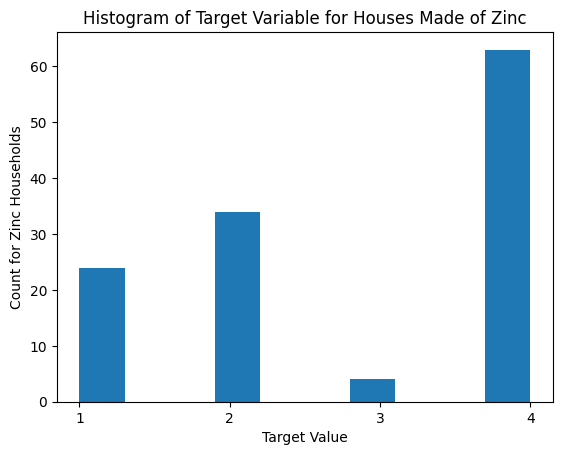

In [ ]:
#Histogram of target for houses made of zinc
df_zinc = df_train.loc[(df_train.loc[:, "techozinc"] == 1) & (df_train.loc[:, "paredzinc"] == 1), "Target"].to_frame()
plt.hist(df_zinc['Target'])
plt.xlabel('Target Value')
plt.xticks(np.arange(1,5,1))
plt.ylabel('Count for Zinc Households')
plt.title('Histogram of Target Variable for Houses Made of Zinc')
plt.show()

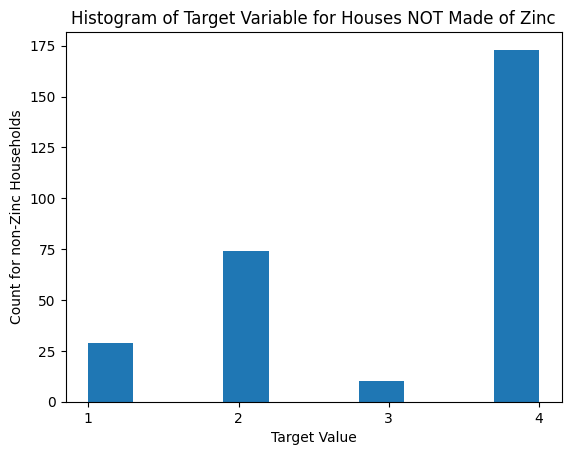

In [ ]:
#Histogram of target for houses NOT made of zinc
df_notzinc = df_train.loc[(df_train.loc[:, "techozinc"] == 0) & (df_train.loc[:, "paredzinc"] == 0), "Target"].to_frame()
plt.hist(df_notzinc['Target'])
plt.xlabel('Target Value')
plt.xticks(np.arange(1,5,1))
plt.ylabel('Count for non-Zinc Households')
plt.title('Histogram of Target Variable for Houses NOT Made of Zinc')
plt.show()

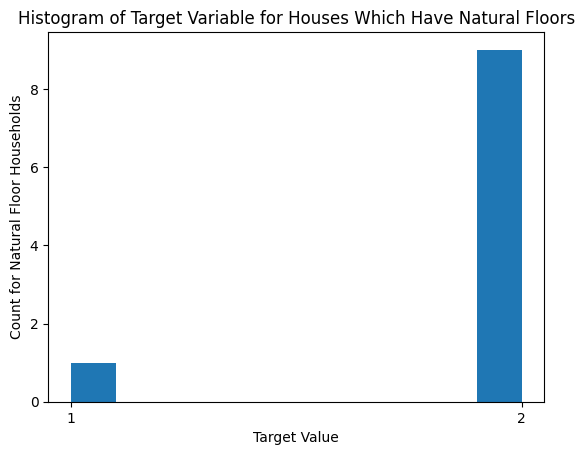

In [ ]:
#Histogram of target for houses whose floor is made of natural materials
df_natural_floor = df_train.loc[(df_train.loc[:, "pisonatur"] == 1), "Target"].to_frame()
plt.hist(df_natural_floor['Target'])
plt.xlabel('Target Value')
plt.xticks(np.arange(1,3,1))
plt.ylabel('Count for Natural Floor Households')
plt.title('Histogram of Target Variable for Houses Which Have Natural Floors')
plt.show()

#notice that there are VERY few observations for this... probably will not include

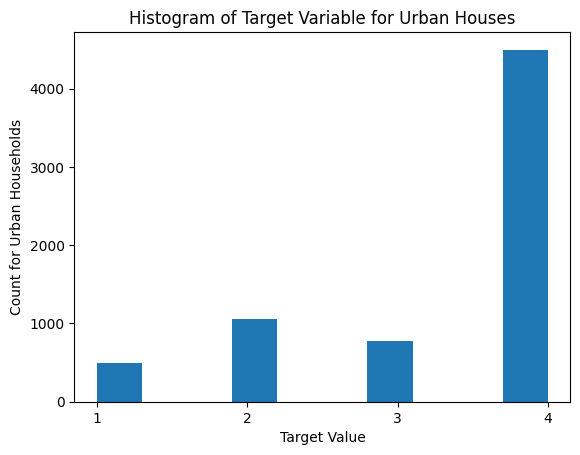

In [ ]:
#Histogram of target for urban area houses
df_urban = df_train.loc[(df_train.loc[:, "area1"] == 1), "Target"].to_frame()
plt.hist(df_urban['Target'])
plt.xlabel('Target Value')
plt.xticks(np.arange(1,5,1))
plt.ylabel('Count for Urban Households')
plt.title('Histogram of Target Variable for Urban Houses')
plt.show()

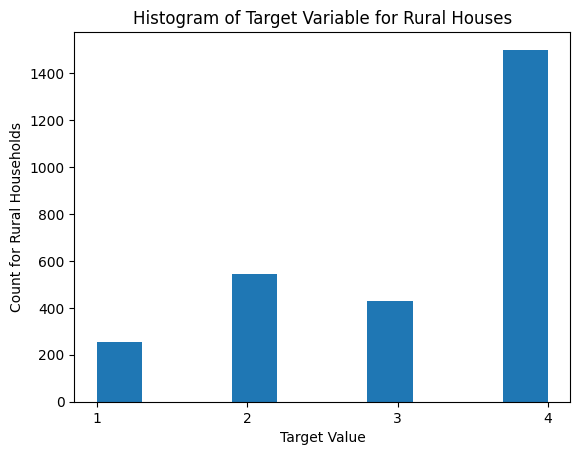

In [ ]:
#Histogram of target for rural area houses
df_rural = df_train.loc[(df_train.loc[:, "area2"] == 1), "Target"].to_frame()
plt.hist(df_rural['Target'])
plt.xlabel('Target Value')
plt.xticks(np.arange(1,5,1))
plt.ylabel('Count for Rural Households')
plt.title('Histogram of Target Variable for Rural Houses')
plt.show()

## 6.) Reflections and Thoughts

In the preceeding segments, we conducted a brief literature review and explored the Kaggle dataset to see if there were any apparent differences in the summary statistics. Here are our reflections and thoughts:

### i.) Target 3 is underrepresented, while Target 4 is overrepresented relative to official statistics

At the moment, our thoughts are to construct and apply probabilistic weights to the training dataset so that the training dataset better represents the population from which it is drawn. Probabilistic weighting can give greater weight to Target 3, while diminishing the weight of Target 4.

### ii.) We are missing close to 1,000 observations for whether a household has a monthly rent, or is owned

This could affect our predictions about the burden of rent on families/individuals (or, more generally, the cost of housing based on predicted income level). We could devise a method to impute rent owing to the differing effects of owning vs. renting on poverty and vulnerability, or we could assign a value of 0 if we are able to identify that the household is squatting.

We will decide on how to address this in the coming weeks of the project.
